In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load the dataset
df = pd.read_csv('sentiment_dataset.csv')
#Display the 1st few rows of dataset
df.head()

,text,sentiment
0,"The service was decent, nothing extraordinary.",neutral
1,"Neutral experience, no strong opinions.",neutral
2,"Average product, does the job.",neutral
3,Customer service is horrible. Stay away!,negative
4,This app is fantastic. Very user-friendly.,positive


C:\Users\sanja\AppData\Local\Temp\ipykernel_18268\2685245189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="viridis")


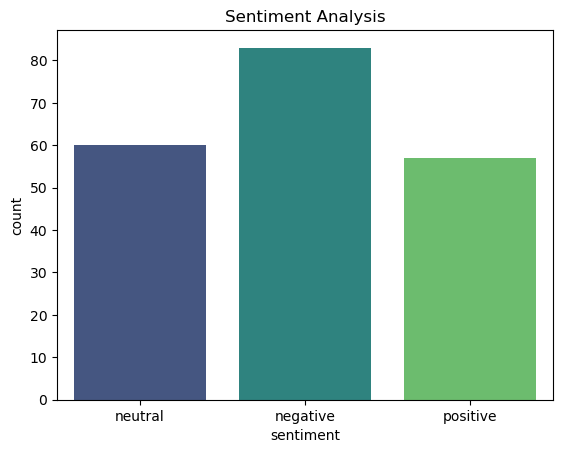

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Model trained successfully. Accuracy and classification report displayed above.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Data Exploration
#visualizing the distribution of sentiments 
sns.countplot(x="sentiment", data=df, palette="viridis")
plt.title("Sentiment Analysis")
plt.show()

# Data Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Download stopwards list
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

#Function to clean text data
def clean_text(text):
    #Tokenize the text and remove stopwards
    text = re.sub(r"[^a-zA-Z ]", "", text.lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

#Apply text cleaning function to the dataset
df["clean_text"] = df["text"].apply(clean_text)

# Vectorization
#Convert text data into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]

#Encode the sentiment labels (convert to numerical values) 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Split the dataset into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Print model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#Print classification model
print(classification_report(y_test, y_pred))

# Conclusion
print("Model trained successfully. Accuracy and classification report displayed above.")
